In [1]:
import numpy as np

sketch = np.load('car.npy', encoding='latin1')
print(sketch.shape)

(182764, 784)


In [2]:
sketch = np.reshape(sketch, [-1, 28, 28])

(280, 280)


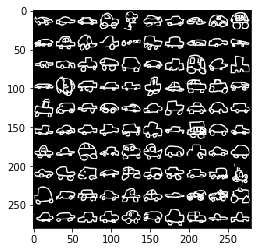

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

n = 10
img_width = 28
img_height = 28

collections = np.zeros((n*img_height, n*img_width))

print(collections.shape)
for i in range(10):
    for j in range(10):
        rand = np.random.randint(sketch.shape[0])
        
        x1, x2, y1, y2 = i*img_height, (i+1)*img_height, j*img_width, (j+1)*img_width
        collections[x1:x2, y1:y2] = sketch[rand]


im = Image.fromarray(collections)
plt.imshow(im)
plt.show()

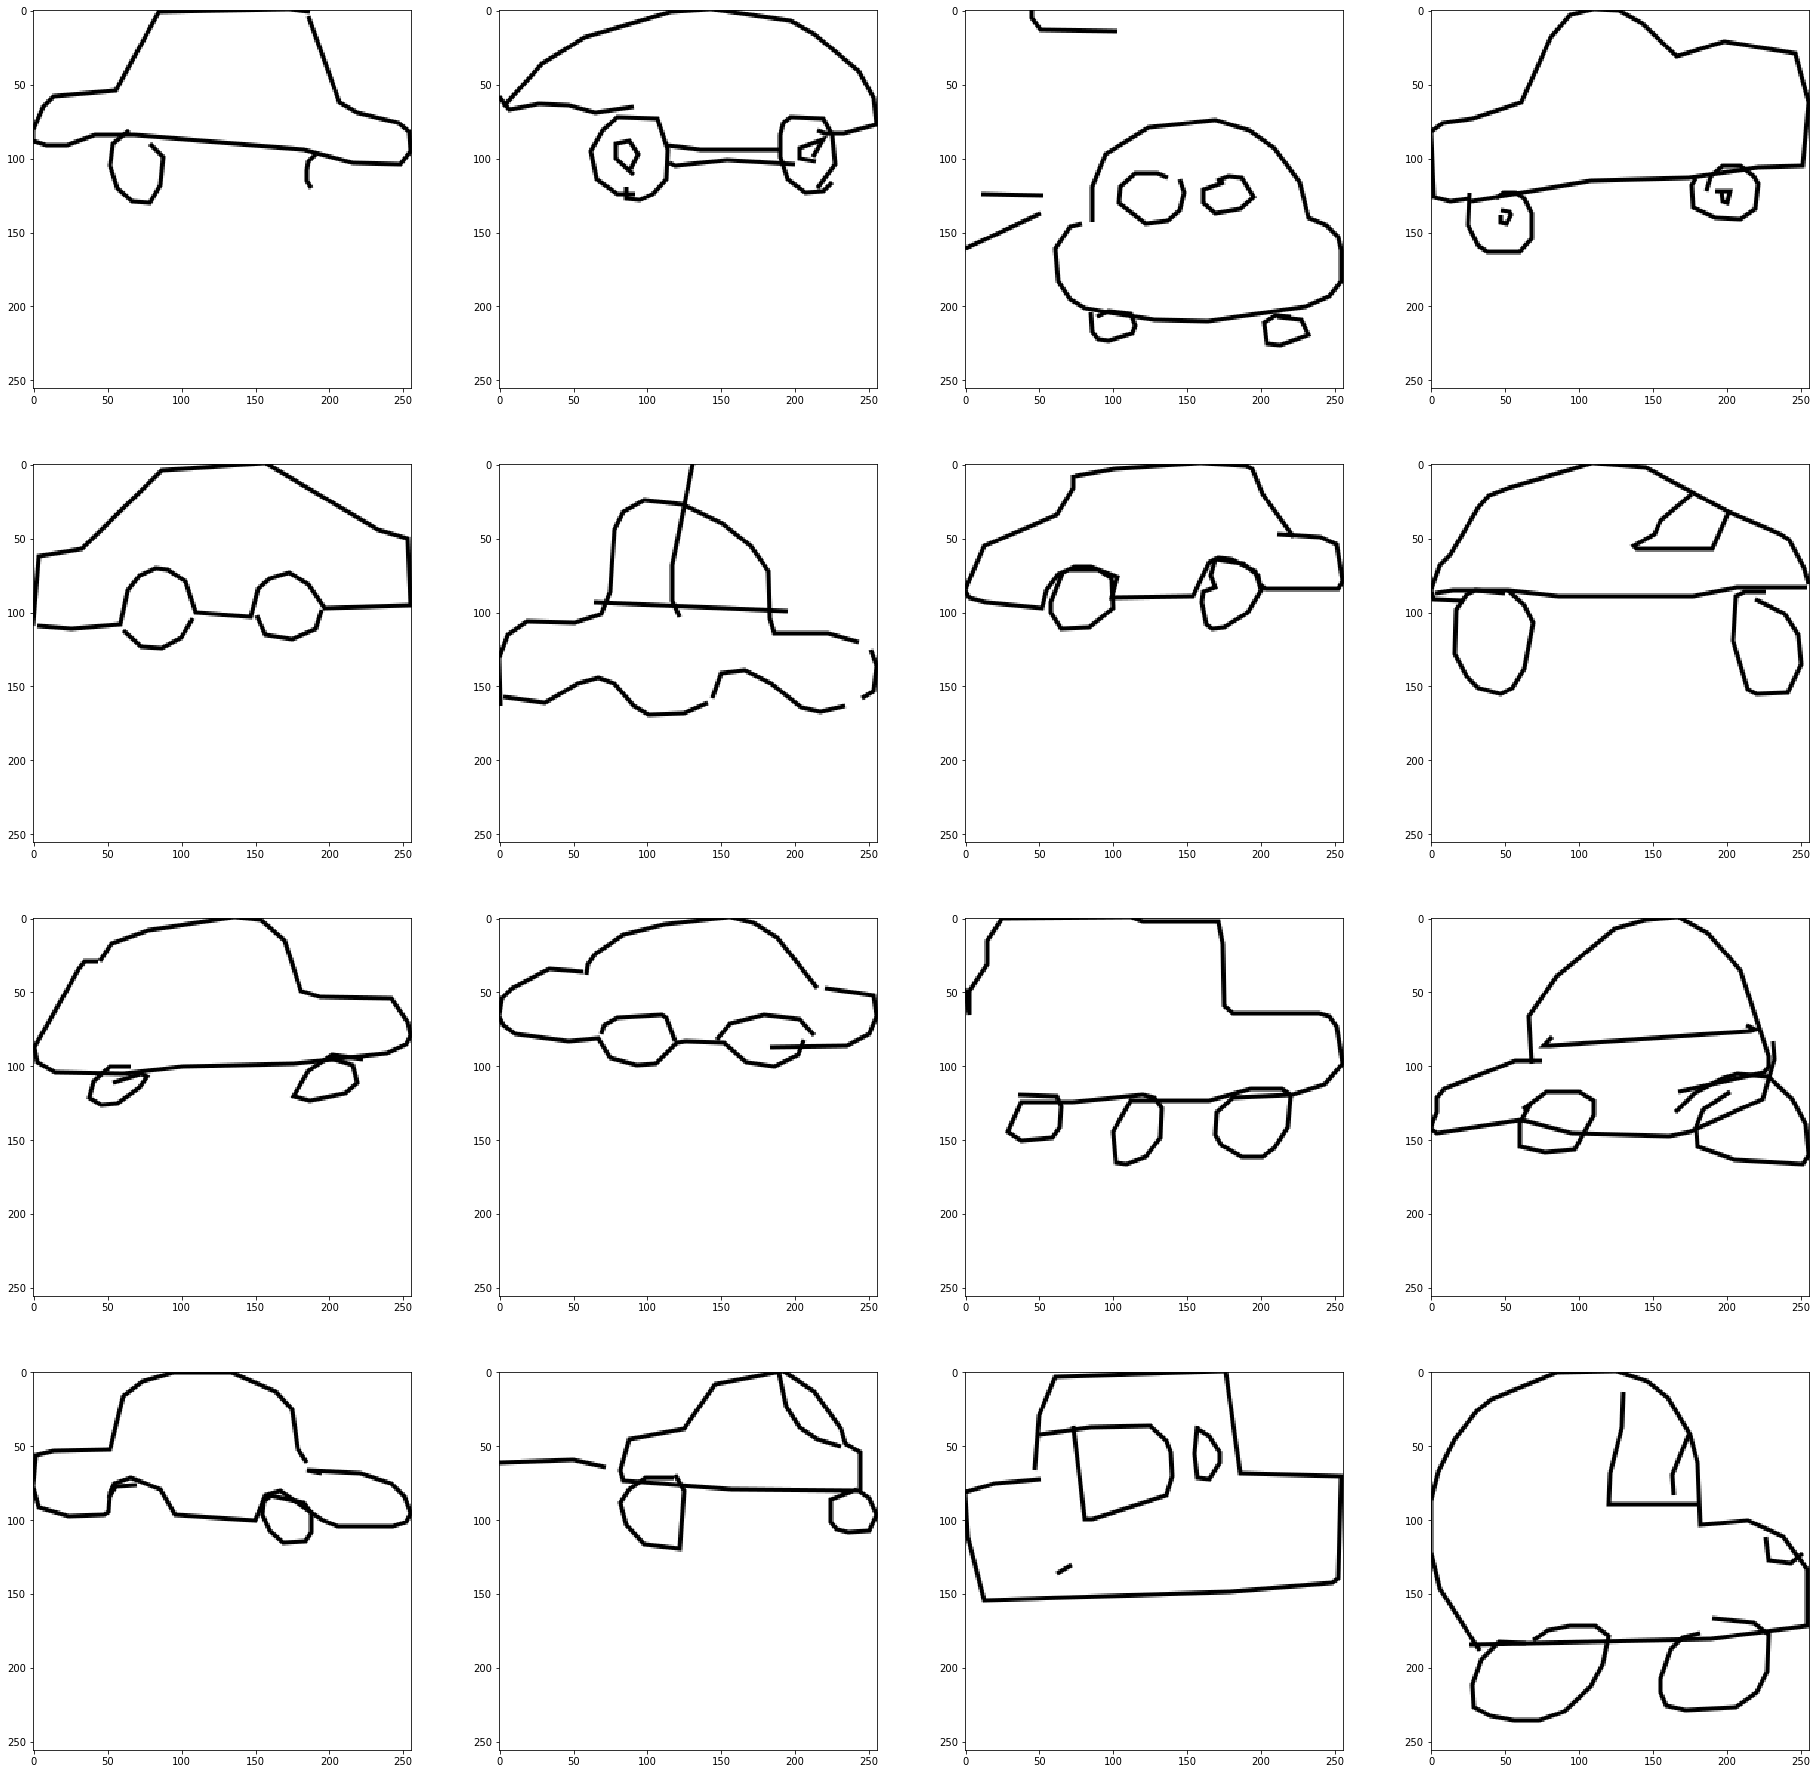

In [6]:
import struct
from struct import unpack
import gizeh

def unpack_drawing(file_handle):
    key_id, = unpack('Q', file_handle.read(8))
    countrycode, = unpack('2s', file_handle.read(2))
    recognized, = unpack('b', file_handle.read(1))
    timestamp, = unpack('I', file_handle.read(4))
    n_strokes, = unpack('H', file_handle.read(2))
    image = []
    for i in range(n_strokes):
        n_points, = unpack('H', file_handle.read(2))
        fmt = str(n_points) + 'B'
        x = unpack(fmt, file_handle.read(n_points))
        y = unpack(fmt, file_handle.read(n_points))
        image.append((x, y))

    return {
        'key_id': key_id,
        'countrycode': countrycode,
        'recognized': recognized,
        'timestamp': timestamp,
        'image': image
    }


def unpack_drawings(filename):
    with open(filename, 'rb') as f:
        while True:
            try:
                yield unpack_drawing(f)
            except struct.error:
                break

def draw_vector(v):
    # initialize surface
    surface = gizeh.Surface(width=256, height=256) # in pixels
    
    for points in v:
        x = list(points[0])
        y = list(points[1])
        P = list(zip(x, y))
        
        line = gizeh.polyline(points=P, stroke_width=3,
                         stroke=(1,1,1))
        line.draw(surface)
        
    # Now export the surface
    im = surface.get_npimage() # returns a (width x height x 3) numpy array
    im = 255 - im
    
    return im
    
ct = 0
n = 4
img_width = 256
img_height = 256

## Demo
fig = plt.figure(figsize=(32, 32))
for drawing in unpack_drawings('car.bin'):
    # do something with the drawing
    
    if ct == n*n:
        break
    
    im = draw_vector(drawing['image'])
    im = Image.fromarray(im)
    fig.add_subplot(n, n, ct+1)
    plt.imshow(im)
    
    ct += 1

plt.show()

In [7]:
import os

save_dir = 'quickdraw_car'
ct = 0
num_of_images = 1000
for drawing in unpack_drawings('car.bin'):
    # do something with the drawing
    
    if ct == num_of_images:
        break
    
    im = draw_vector(drawing['image'])
    im = Image.fromarray(im)
    im.save(os.path.join(save_dir, "{:04d}.png".format(ct)))
    
    print("{:04d}.png".format(ct))
    ct += 1


0000.png
0001.png
0002.png
0003.png
0004.png
0005.png
0006.png
0007.png
0008.png
0009.png
0010.png
0011.png
0012.png
0013.png
0014.png
0015.png
0016.png
0017.png
0018.png
0019.png
0020.png
0021.png
0022.png
0023.png
0024.png
0025.png
0026.png
0027.png
0028.png
0029.png
0030.png
0031.png
0032.png
0033.png
0034.png
0035.png
0036.png
0037.png
0038.png
0039.png
0040.png
0041.png
0042.png
0043.png
0044.png
0045.png
0046.png
0047.png
0048.png
0049.png
0050.png
0051.png
0052.png
0053.png
0054.png
0055.png
0056.png
0057.png
0058.png
0059.png
0060.png
0061.png
0062.png
0063.png
0064.png
0065.png
0066.png
0067.png
0068.png
0069.png
0070.png
0071.png
0072.png
0073.png
0074.png
0075.png
0076.png
0077.png
0078.png
0079.png
0080.png
0081.png
0082.png
0083.png
0084.png
0085.png
0086.png
0087.png
0088.png
0089.png
0090.png
0091.png
0092.png
0093.png
0094.png
0095.png
0096.png
0097.png
0098.png
0099.png
0100.png
0101.png
0102.png
0103.png
0104.png
0105.png
0106.png
0107.png
0108.png
0109.png
0110.png
0

0925.png
0926.png
0927.png
0928.png
0929.png
0930.png
0931.png
0932.png
0933.png
0934.png
0935.png
0936.png
0937.png
0938.png
0939.png
0940.png
0941.png
0942.png
0943.png
0944.png
0945.png
0946.png
0947.png
0948.png
0949.png
0950.png
0951.png
0952.png
0953.png
0954.png
0955.png
0956.png
0957.png
0958.png
0959.png
0960.png
0961.png
0962.png
0963.png
0964.png
0965.png
0966.png
0967.png
0968.png
0969.png
0970.png
0971.png
0972.png
0973.png
0974.png
0975.png
0976.png
0977.png
0978.png
0979.png
0980.png
0981.png
0982.png
0983.png
0984.png
0985.png
0986.png
0987.png
0988.png
0989.png
0990.png
0991.png
0992.png
0993.png
0994.png
0995.png
0996.png
0997.png
0998.png
0999.png
